## Import Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Training image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None, 
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 2239 files belonging to 9 classes.


### Validation image preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None, 
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 118 files belonging to 9 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[1.76277100e+02 1.28353271e+02 1.30700684e+02]
   [1.77621338e+02 1.32805176e+02 1.35047852e+02]
   [1.83236084e+02 1.36255127e+02 1.39381104e+02]
   ...
   [1.85110352e+02 1.53304688e+02 1.48675293e+02]
   [1.85183350e+02 1.56470947e+02 1.52937500e+02]
   [1.87884033e+02 1.58933350e+02 1.58489258e+02]]

  [[1.79546875e+02 1.28156250e+02 1.30640137e+02]
   [1.78806152e+02 1.30376709e+02 1.32801758e+02]
   [1.84138428e+02 1.37937012e+02 1.41481445e+02]
   ...
   [1.84684570e+02 1.55765625e+02 1.53223633e+02]
   [1.86517090e+02 1.56637451e+02 1.55218506e+02]
   [1.87199463e+02 1.56241699e+02 1.60894287e+02]]

  [[1.79247559e+02 1.29512207e+02 1.34427246e+02]
   [1.84601807e+02 1.32908936e+02 1.35692871e+02]
   [1.82306641e+02 1.36110840e+02 1.38466553e+02]
   ...
   [1.86392822e+02 1.58740967e+02 1.58433350e+02]
   [1.82846436e+02 1.53224121e+02 1.54250488e+02]
   [1.84909668e+02 1.55065918e+02 1.55468750e+02]]

  ...

  [[1.82400146e+02 1.37776855e+02 1.47466064e+02]
   [1

 ## Building model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [8]:
model = Sequential()

## Building Convolutional Layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

d:\OJT Project - experiment\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) #to avoid overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [19]:
model.add(Dense(units=9, activation='softmax'))


## Compiling Model

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │        13,509 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,799,233 (29.75 MB)

 Trainable params: 7,799,233 (29.75 MB)

 Non-trainable params: 0 (0.00 B)

 ### Model Training

In [25]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 61s 877ms/step - accuracy: 0.5666 - loss: 1.2267 - val_accuracy: 0.3814 - val_loss: 1.8815
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 67s 950ms/step - accuracy: 0.5925 - loss: 1.1738 - val_accuracy: 0.4068 - val_loss: 1.7749
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.5909 - loss: 1.1980 - val_accuracy: 0.3814 - val_loss: 1.9980
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.6126 - loss: 1.0928 - val_accuracy: 0.4068 - val_loss: 1.7401
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.6339 - loss: 1.0831 - val_accuracy: 0.3644 - val_loss: 1.9060
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.6358 - loss: 0.9889 - val_accuracy: 0.3814 - val_loss: 2.0438
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.6465 - loss: 0.9870 - val_accuracy: 0.3983 - val_loss: 2.0682
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.6955 - loss: 0.8774 - val_accuracy: 0.3814 - va

## Model evaluation

In [26]:
#model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - accuracy: 0.9169 - loss: 0.1628


In [27]:
print(train_loss,train_acc)

0.14654141664505005 0.927646279335022


In [28]:
#model on validation set
val_loss,val_acc = model.evaluate(validation_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.3986 - loss: 4.4130


In [29]:
print(val_loss,val_acc)

4.5793328285217285 0.38983049988746643


## saving model

In [31]:
model.save("trained_skin_disease_model.keras")

In [32]:
training_history.history

{'accuracy': [0.5658776164054871,
  0.5815095901489258,
  0.5815095901489258,
  0.5993747115135193,
  0.6114336848258972,
  0.6221527457237244,
  0.6382313370704651,
  0.6744081974029541,
  0.6833407878875732,
  0.7016525268554688,
  0.7320232391357422,
  0.7619472742080688,
  0.7833854556083679,
  0.8052701950073242,
  0.8320679068565369,
  0.8316212892532349,
  0.8539526462554932,
  0.856185793876648,
  0.8825368285179138,
  0.8811969757080078,
  0.8852165937423706,
  0.878070592880249,
  0.9084412455558777,
  0.9084412455558777,
  0.9106743931770325,
  0.9169272184371948,
  0.9209468364715576,
  0.9191603660583496,
  0.9213934540748596,
  0.9173738360404968,
  0.9053148627281189,
  0.9240732192993164,
  0.9187136888504028,
  0.9231799840927124,
  0.9245198965072632,
  0.915587306022644,
  0.9182670712471008,
  0.9129075407981873,
  0.91469407081604,
  0.9133541584014893,
  0.9124609231948853,
  0.9325591921806335,
  0.9164806008338928,
  0.9187136888504028,
  0.915140688419342,
  0.

In [33]:
#recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [34]:
training_history.history['accuracy']


[0.5658776164054871,
 0.5815095901489258,
 0.5815095901489258,
 0.5993747115135193,
 0.6114336848258972,
 0.6221527457237244,
 0.6382313370704651,
 0.6744081974029541,
 0.6833407878875732,
 0.7016525268554688,
 0.7320232391357422,
 0.7619472742080688,
 0.7833854556083679,
 0.8052701950073242,
 0.8320679068565369,
 0.8316212892532349,
 0.8539526462554932,
 0.856185793876648,
 0.8825368285179138,
 0.8811969757080078,
 0.8852165937423706,
 0.878070592880249,
 0.9084412455558777,
 0.9084412455558777,
 0.9106743931770325,
 0.9169272184371948,
 0.9209468364715576,
 0.9191603660583496,
 0.9213934540748596,
 0.9173738360404968,
 0.9053148627281189,
 0.9240732192993164,
 0.9187136888504028,
 0.9231799840927124,
 0.9245198965072632,
 0.915587306022644,
 0.9182670712471008,
 0.9129075407981873,
 0.91469407081604,
 0.9133541584014893,
 0.9124609231948853,
 0.9325591921806335,
 0.9164806008338928,
 0.9187136888504028,
 0.915140688419342,
 0.915140688419342,
 0.9182670712471008,
 0.9258597493171692,

## Accuracy visualization

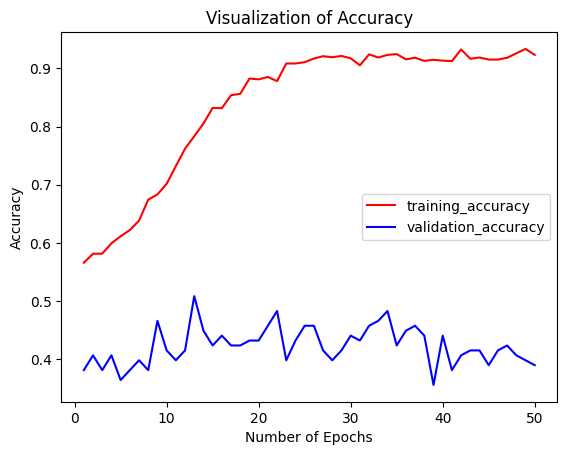

In [37]:
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='training_accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='validation_accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy")
plt.legend()
plt.show()


## some other metrics for model evaluation


In [38]:
class_name = validation_set.class_names
class_name

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None, 
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 118 files belonging to 9 classes.


In [40]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step


(array([[9.3259923e-03, 6.4220723e-05, 1.2141430e-04, ..., 6.6339602e-03,
         1.2296130e-04, 8.6877131e-05],
        [1.2282748e-06, 1.4496420e-09, 2.3464219e-09, ..., 2.9500528e-05,
         3.5261878e-09, 7.5512050e-09],
        [6.7280862e-03, 1.1893408e-06, 4.0518952e-07, ..., 3.6447069e-08,
         5.4172074e-07, 3.7726441e-08],
        ...,
        [2.8223412e-09, 7.2013450e-01, 3.1564941e-08, ..., 1.3154723e-10,
         1.5618649e-09, 2.7986535e-01],
        [5.2471161e-16, 9.2565566e-01, 2.9088731e-09, ..., 8.7345948e-16,
         7.2318555e-14, 7.4343309e-02],
        [0.0000000e+00, 1.2021257e-27, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 1.0000000e+00]], dtype=float32),
 (118, 9))

In [41]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [42]:
predicted_categories 

<tf.Tensor: shape=(118,), dtype=int64, numpy=
array([4, 4, 4, 4, 4, 1, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 7, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 3, 7, 1, 1, 3, 4, 7, 4, 3, 4, 4, 1, 1, 4, 1, 1,
       1, 2, 2, 1, 4, 4, 4, 4, 7, 3, 0, 5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 5, 5, 1, 6, 1, 5, 5, 3,
       5, 5, 5, 5, 1, 5, 5, 3, 3, 3, 3, 3, 5, 4, 4, 3, 1, 7, 5, 7, 1, 1,
       7, 5, 5, 7, 1, 1, 1, 8], dtype=int64)>

In [43]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(118, 9), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [44]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(118,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8], dtype=int64)>

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00        16
      basal cell carcinoma       0.43      0.75      0.55        16
            dermatofibroma       1.00      0.12      0.22        16
                  melanoma       0.15      0.12      0.14        16
                     nevus       0.32      0.94      0.48        16
pigmented benign keratosis       0.59      0.62      0.61        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.50      0.25      0.33        16
           vascular lesion       1.00      0.33      0.50         3

                  accuracy                           0.39       118
                 macro avg       0.44      0.35      0.31       118
              weighted avg       0.43      0.39      0.33       118



In [47]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[ 0,  1,  0,  0, 14,  1,  0,  0,  0],
       [ 0, 12,  0,  1,  0,  1,  0,  2,  0],
       [ 0,  6,  2,  2,  5,  0,  0,  1,  0],
       [ 1,  0,  0,  2, 11,  1,  0,  1,  0],
       [ 0,  0,  0,  1, 15,  0,  0,  0,  0],
       [ 0,  3,  0,  2,  0, 10,  1,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  2,  2,  4,  0,  4,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  1]], dtype=int64)

## confucion matrix visualization

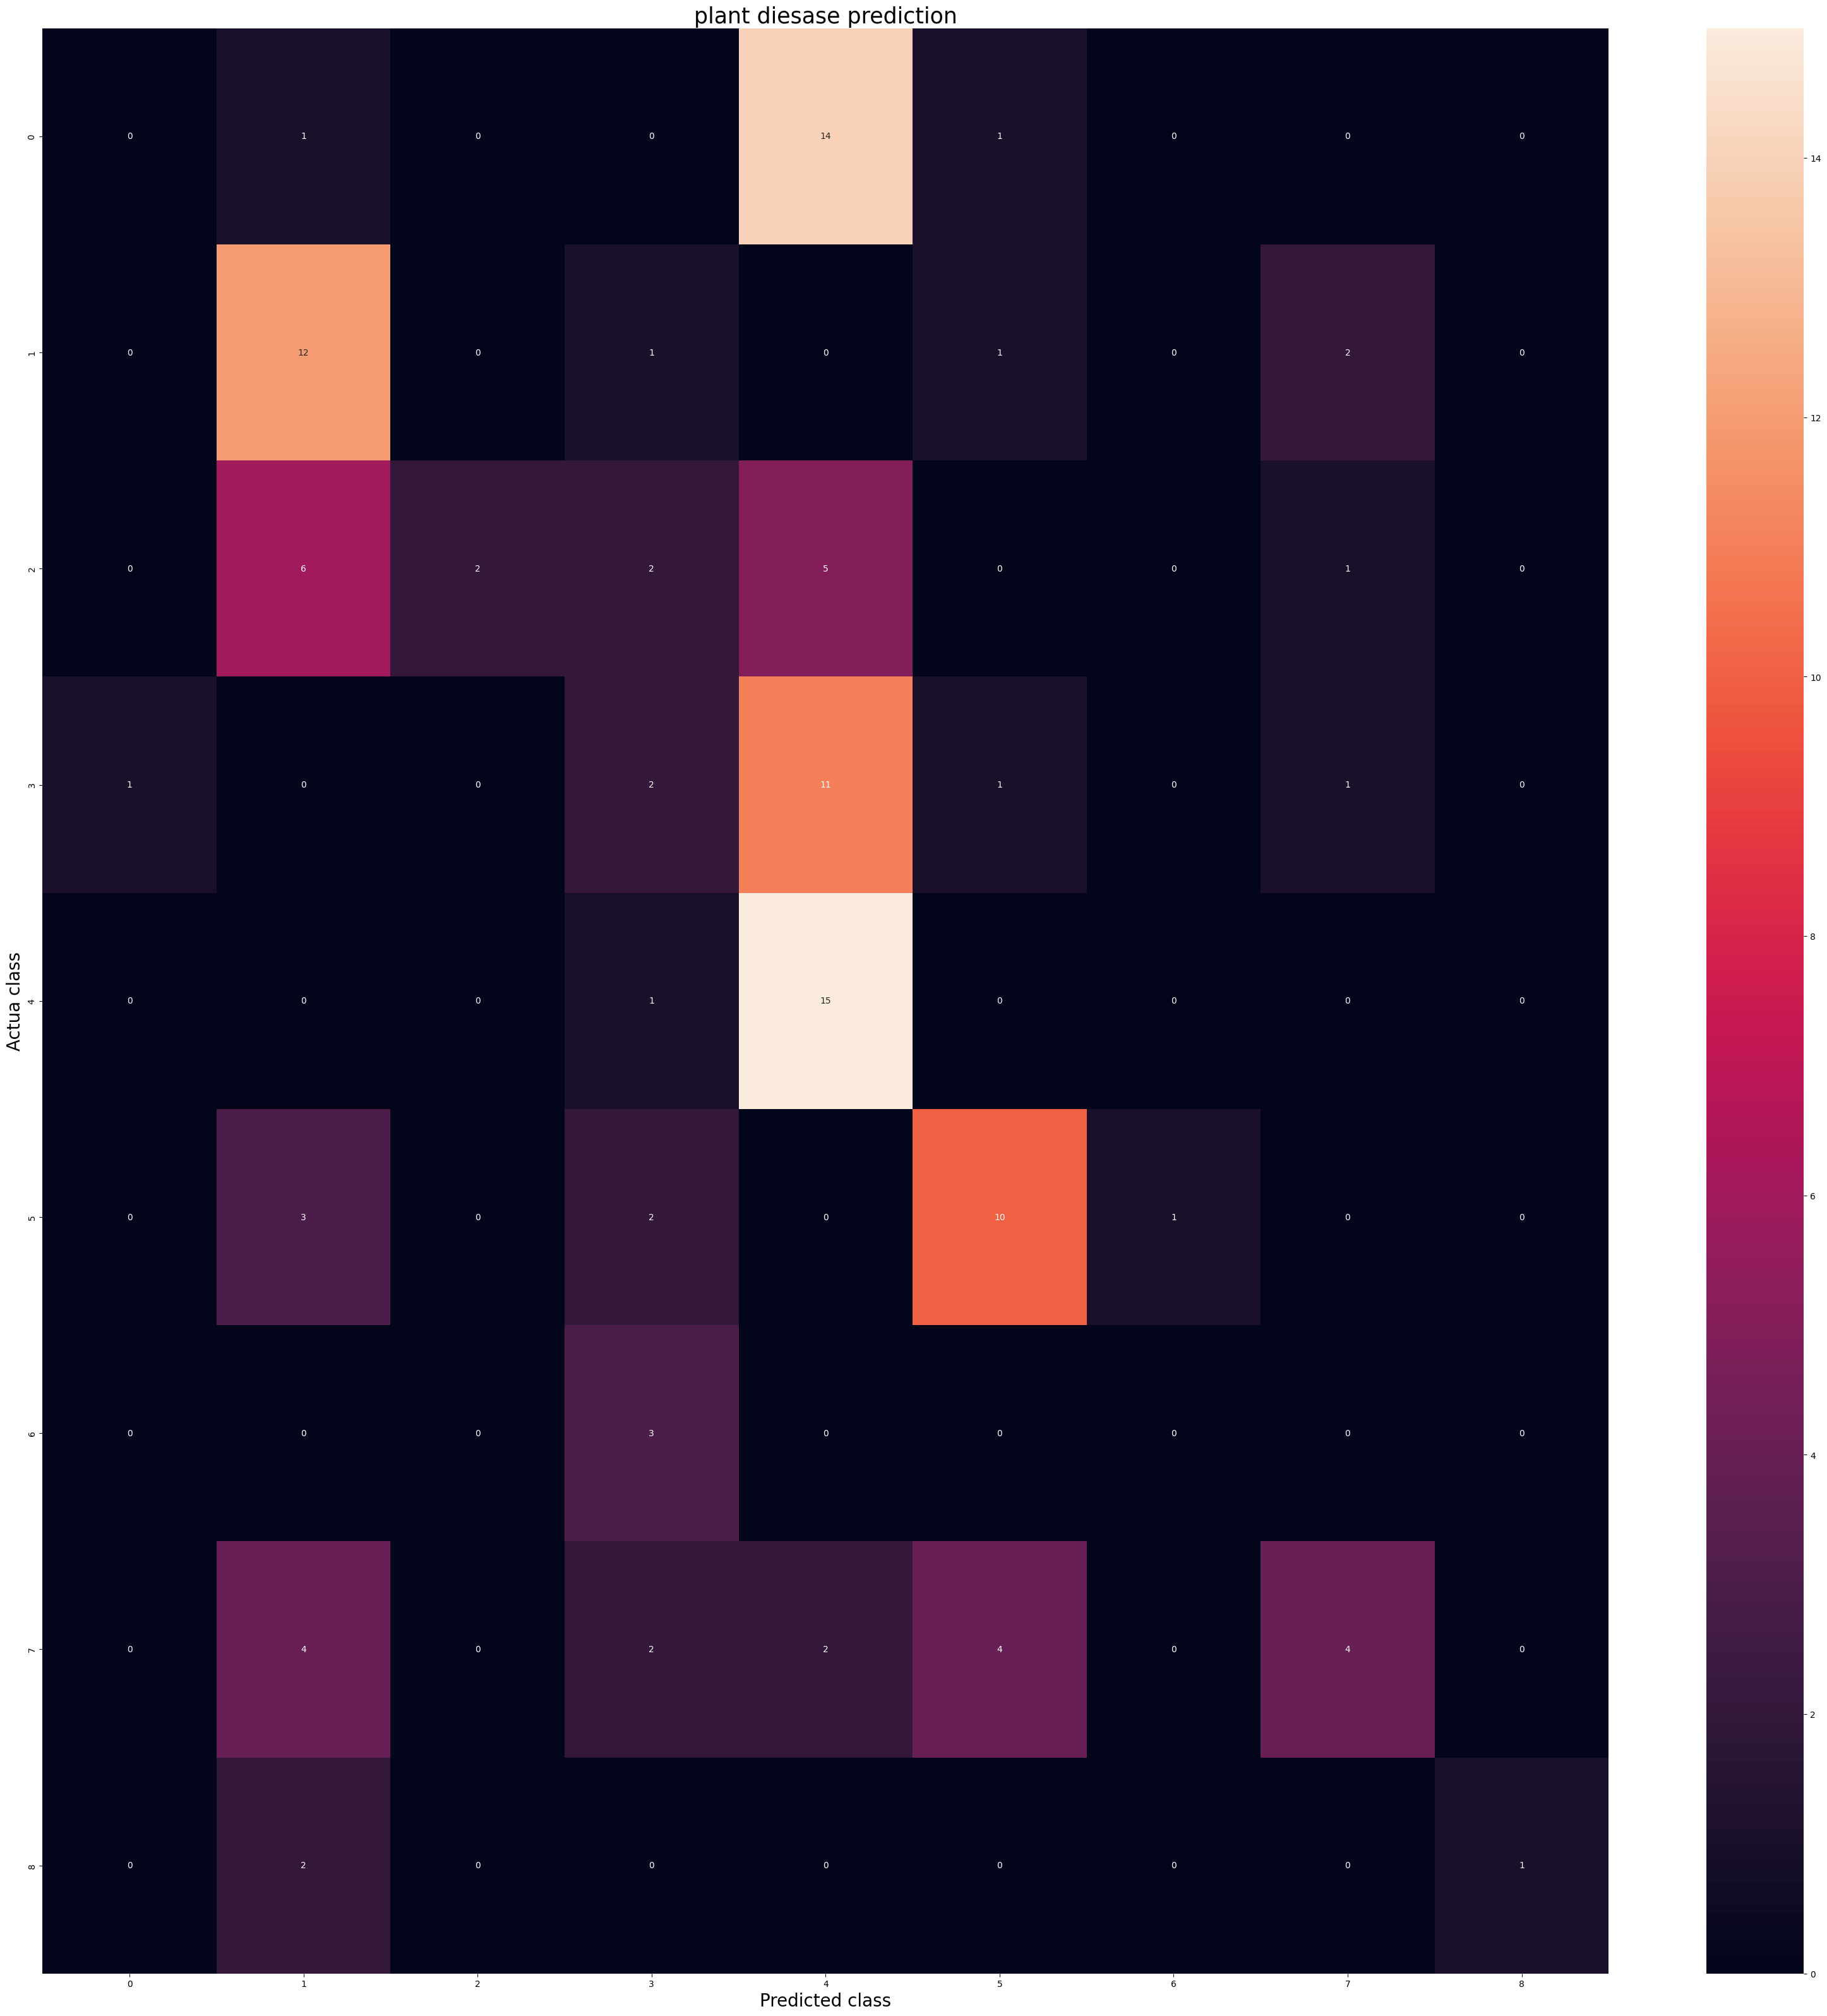

In [48]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actua class",fontsize=20)
plt.title("plant diesase prediction",fontsize=25)
plt.show()